# WeatherPy
----


# Data Analysis :

   >1. The Latitude vs Temperature plot helps us to understand that the temperature gets higher nearer to the equator and drops further away.
   >2. From the Latitude vs Humidity plot we could notice the Humidity(%) remains high nearer the equator whereas it is evenly distributed towards the poles.
   >3. The scatter plot of Latitude vs Cloudiness(%) supports that cloudiness is not related to the latitude
   >4. The scatter plot of Latitude vs Wind Speed confirms that wind speed is distributed evenly.


   > The N.Hemisphere with the "rvalue: 0.7532828891693544" shows that the temperature is having a positive correlation with the latitude.Whereas the scatter plot of S.Hemisphere having "r value: 0.7852724061647582" indicate that the temperature is having a negative correlation with the latitude.

   > The S.Hemisphere temperature seems to be milder than the same latitudes in the N.Hemisphere.And the hottest temperature is recorded between 0º and 20º North.
   
   > The other parameters like Humidity, Cloudiness, and Wind Speed show very weak/no relation with the latitude. This can be confirmed from the absolute rvalues obtained for each hemisphere which supports the observation.

   > From the VacationPy notebook, we could notice that across the world the humidity seems higher which is shown by the red dots in the heatmap.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        


# Print the city count to confirm sufficient count
print(len(cities))

600


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cities_num = []
cities_name = []
lat= []
lng= []
temp= []
humidity= []
cloudy= []
wind_speed= []
country= []
date= []
record = 0
set = 1
city_count = 0
url = "http://api.openweathermap.org/data/2.5/weather?"
#query_url = f"{url}appid={weather_api_key}&q="
#&units=imperial


In [5]:
print("Beginning Data Retrieval")
print("-"*64)
for city in cities:      
    query_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    #print(query_url+city)
    
    try:
         
        city_id = weather_json["id"]    
        cities_num.append(city_id)

        city_name = weather_json["name"]
        cities_name.append(city_name)

        lat.append(weather_json["coord"]["lat"])

        lng.append(weather_json["coord"]["lon"])        

        temp.append(weather_json["main"]["temp"])

        humidity.append(weather_json["main"]["humidity"])

        cloudy.append(weather_json["clouds"]["all"])

        wind_speed.append(weather_json["wind"]["speed"])

        country.append(weather_json["sys"]["country"])

        date.append(weather_json["dt"])

        if record >49:
            record =0
            set +=1
            city_count +=1
            print("-"*64)

        elif set>1:
            city_count +=1
            print(f"Processing Record {record} of Set {set} | {city_name} ")
            record +=1

        else:
            record +=1
            city_count +=1
            print(f"Processing Record {record} of Set {set} | {city_name} ")




    except:
        
        #print(weather_json["message"])
        print(f"City not found. Skipping...")
        pass
    
print("-"*64)
print("Data Retrieval Complete")
print("-"*64)



Beginning Data Retrieval
----------------------------------------------------------------
Processing Record 1 of Set 1 | Port Macquarie 
Processing Record 2 of Set 1 | Punta Arenas 
Processing Record 3 of Set 1 | Rikitea 
Processing Record 4 of Set 1 | Chokurdakh 
Processing Record 5 of Set 1 | Kapaa 
Processing Record 6 of Set 1 | Clyde River 
Processing Record 7 of Set 1 | Bluff 
Processing Record 8 of Set 1 | Ponta do Sol 
Processing Record 9 of Set 1 | Vaini 
Processing Record 10 of Set 1 | Ushuaia 
Processing Record 11 of Set 1 | Turan 
Processing Record 12 of Set 1 | Vardø 
Processing Record 13 of Set 1 | San Patricio 
Processing Record 14 of Set 1 | Albany 
Processing Record 15 of Set 1 | East London 
Processing Record 16 of Set 1 | Baruun-Urt 
Processing Record 17 of Set 1 | Damaturu 
Processing Record 18 of Set 1 | Lebu 
Processing Record 19 of Set 1 | Arraial do Cabo 
Processing Record 20 of Set 1 | Mahébourg 
Processing Record 21 of Set 1 | Ancud 
Processing Record 22 of Set

Processing Record 26 of Set 4 | Ambilobe 
Processing Record 27 of Set 4 | São Borja 
Processing Record 28 of Set 4 | Port Hardy 
Processing Record 29 of Set 4 | Nefteyugansk 
Processing Record 30 of Set 4 | Mandlā 
Processing Record 31 of Set 4 | Bathsheba 
Processing Record 32 of Set 4 | Mar del Plata 
Processing Record 33 of Set 4 | Rudnyy 
City not found. Skipping...
Processing Record 34 of Set 4 | Daphne 
Processing Record 35 of Set 4 | Castro 
Processing Record 36 of Set 4 | Egvekinot 
Processing Record 37 of Set 4 | Kavaratti 
Processing Record 38 of Set 4 | Chunoyar 
Processing Record 39 of Set 4 | Inyonga 
Processing Record 40 of Set 4 | North Bend 
Processing Record 41 of Set 4 | Nhulunbuy 
Processing Record 42 of Set 4 | Monrovia 
City not found. Skipping...
Processing Record 43 of Set 4 | Taoudenni 
Processing Record 44 of Set 4 | Vallenar 
Processing Record 45 of Set 4 | Villablino 
Processing Record 46 of Set 4 | Chernyshevskiy 
Processing Record 47 of Set 4 | Juneau 
Proc

Processing Record 2 of Set 8 | Price 
Processing Record 3 of Set 8 | Oktyabr'skiy 
Processing Record 4 of Set 8 | College 
Processing Record 5 of Set 8 | Hualmay 
Processing Record 6 of Set 8 | Vestmannaeyjar 
Processing Record 7 of Set 8 | Bhag 
Processing Record 8 of Set 8 | San Cristobal 
Processing Record 9 of Set 8 | Ayan 
Processing Record 10 of Set 8 | Ust-Nera 
Processing Record 11 of Set 8 | Mayo 
City not found. Skipping...
Processing Record 12 of Set 8 | Kulevcha 
Processing Record 13 of Set 8 | Ko Samui 
Processing Record 14 of Set 8 | Placetas 
Processing Record 15 of Set 8 | Muzhi 
Processing Record 16 of Set 8 | Zamora 
Processing Record 17 of Set 8 | Inndyr 
Processing Record 18 of Set 8 | Barabai 
Processing Record 19 of Set 8 | Tazmalt 
Processing Record 20 of Set 8 | Lismore 
City not found. Skipping...
Processing Record 21 of Set 8 | Owando 
City not found. Skipping...
Processing Record 22 of Set 8 | Finschhafen 
Processing Record 23 of Set 8 | Nieves 
Processing Re

Processing Record 32 of Set 11 | Raudeberg 
Processing Record 33 of Set 11 | Homer 
Processing Record 34 of Set 11 | Shenjiamen 
Processing Record 35 of Set 11 | Zlobin 
Processing Record 36 of Set 11 | Touros 
Processing Record 37 of Set 11 | Mudgee 
Processing Record 38 of Set 11 | Mallaig 
Processing Record 39 of Set 11 | Mackay 
Processing Record 40 of Set 11 | Thanatpin 
----------------------------------------------------------------
Data Retrieval Complete
----------------------------------------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict = {
    "City": cities_name,        
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Humidity": humidity,
    "Cloudiness":cloudy,
    "Wind Speed":wind_speed,
    "Country":country,
    "Date":date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv(output_data_file)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Macquarie,-31.4333,152.9167,53.56,46,0,4.59,AU,1630192375
1,Punta Arenas,-53.1500,-70.9167,39.31,87,75,10.36,CL,1630192376
2,Rikitea,-23.1203,-134.9692,73.74,72,0,19.86,PF,1630192376
3,Chokurdakh,70.6333,147.9167,36.03,96,100,7.61,RU,1630192377
4,Kapaa,22.0752,-159.3190,82.67,64,1,5.01,US,1630192160
...,...,...,...,...,...,...,...,...,...
546,Touros,-5.1989,-35.4608,79.70,81,98,16.67,BR,1630192377
547,Mudgee,-32.5943,149.5871,46.45,76,40,4.61,AU,1630192592
548,Mallaig,54.2169,-111.3685,68.68,50,75,6.60,CA,1630192593
549,Mackay,-21.1500,149.2000,76.05,78,30,1.45,AU,1630192593


In [7]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,20.814806,16.924274,65.767132,72.484574,56.764065,7.297568,1.630192e+09
std,33.964448,92.688787,14.814238,20.677507,39.414057,5.096919,9.106570e+01
min,-54.800000,-179.166700,30.220000,8.000000,0.000000,0.000000,1.630192e+09
25%,-8.405850,-68.525450,54.005000,65.000000,13.000000,3.520000,1.630192e+09
50%,26.883300,19.324600,66.830000,77.000000,69.000000,6.110000,1.630192e+09
75%,50.465450,101.051050,77.920000,87.000000,98.000000,10.090000,1.630193e+09
max,78.218600,179.316700,109.180000,100.000000,100.000000,32.100000,1.630193e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
weather_data.loc[weather_data["Humidity"] >100,:]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

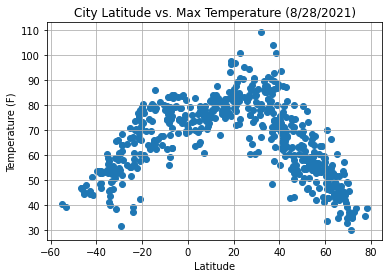

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")
#from datetime import date
#today =date.today()
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature (8/28/2021)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Temperature.png")

# Show plot
plt.show()

### The above plot helps us to understand that the temperature gets higher nearer to the equator and drops further away.

## Latitude vs. Humidity Plot

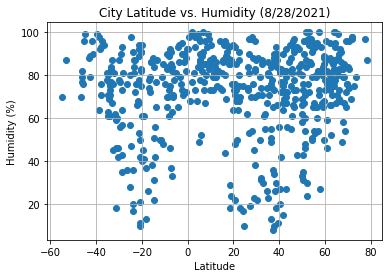

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")
#today =date.today()
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (8/28/2021)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity.png")

# Show plot
plt.show()

### Humidity(%) remains high nearer the equator whereas it is evenly distributed towards the poles.

## Latitude vs. Cloudiness Plot

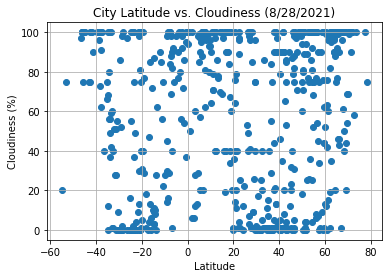

In [14]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (8/28/2021)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness.png")

# Show plot
plt.show()

### The scatter plot confirms that cloudiness is not related to the latitude

## Latitude vs. Wind Speed Plot

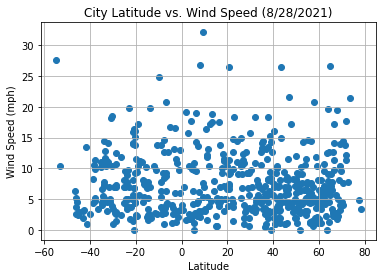

In [15]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (8/28/2021)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeed.png")

# Show plot
plt.show()

### The scatter plot confirms that wind speed is distributed evenly.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [16]:
hem_n_df = weather_data.loc[weather_data['Lat'] >= 0,:]
x_values_n = hem_n_df["Lat"]
y_temp_n = hem_n_df['Max Temp']
 
# Perform a linear regression on Max Temperature vs. latitude
(slope_temp_n, intercept_temp_n, rvalue_temp_n, pvalue, stderr) = stats.linregress(x_values_n, y_temp_n)

# Get regression values
regress_values_tempn = x_values_n * slope_temp_n + intercept_temp_n
#print(regress_values_tempn)
line_eq_n = "y = " + str(round(slope_temp_n,2)) + "x +" + str(round(intercept_temp_n,2))

The r value is: -0.7532828891693544


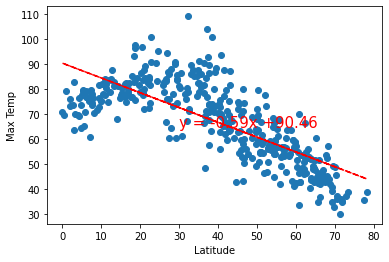

In [17]:
plt.scatter(x_values_n,y_temp_n)
plt.plot(x_values_n,regress_values_tempn,"r--")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq_n,(30,65),fontsize=15,color="red")

# Print r value
print(f"The r value is: {rvalue_temp_n}")

# Save the figure
plt.savefig("temperature_N_hemisphere.png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [18]:
hem_s_df = weather_data.loc[weather_data['Lat'] < 0,:]
x_values_s = hem_s_df["Lat"]
y_temp_s = hem_s_df['Max Temp']
# Perform a linear regression on Max Temperature vs. latitude
(slope_temp_s, intercept_temp_s, rvalue_temp_s, pvalue, stderr) = stats.linregress(x_values_s, y_temp_s)

# Get regression values
regress_values_temps = x_values_s * slope_temp_s + intercept_temp_s
#print(regress_values_temps)
line_eq_s = "y = " + str(round(slope_temp_s,2)) + "x +" + str(round(intercept_temp_s,2))

The r value is: 0.7852724061647582


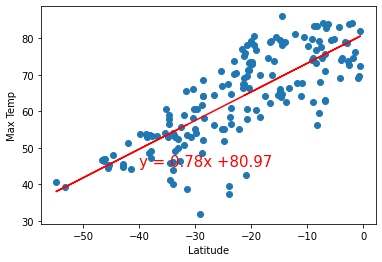

In [19]:
plt.scatter(x_values_s,y_temp_s)
plt.plot(x_values_s,regress_values_temps,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq_s,(-40,45),fontsize=15,color="red")

# Print r value
print(f"The r value is: {rvalue_temp_s}")

# Save the figure
plt.savefig("temperature_S_hemisphere.png")

# Show plot
plt.show()

### It is observed that in S.Hemisphere there is strong positive correlation between the latitude and temperature, where as its strong negative correlation in the N.Hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [20]:
#hem_n_df = weather_data.loc[weather_data['Lat'] >= 0,:]
#x_values_n = hem_n_df["Lat"]
y_humid_n = hem_n_df['Humidity']
 
# Perform a linear regression on Max Temperature vs. latitude
(slope_humid_n, intercept_humid_n, rvalue_humid_n, pvalue, stderr) = stats.linregress(x_values_n, y_humid_n)

# Get regression values
regress_values_humidn = x_values_n * slope_humid_n + intercept_humid_n
#print(regress_values_humidn)
line_eq_n = "y = " + str(round(slope_humid_n,2)) + "x +" + str(round(intercept_humid_n,2))

The r value is: 0.007236508685676074


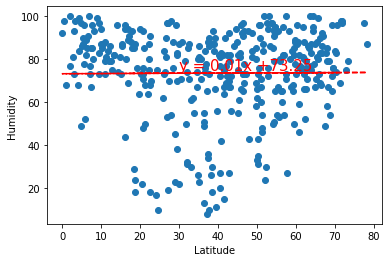

In [21]:
plt.scatter(x_values_n,y_humid_n)
plt.plot(x_values_n,regress_values_humidn,"r--")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq_n,(30,75),fontsize=15,color="red")

# Print r value
print(f"The r value is: {rvalue_humid_n}")

# Save the figure
plt.savefig("humidity_N_hemisphere.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [22]:
#hem_s_df = weather_data.loc[weather_data['Lat'] < 0,:]
#x_values_s = hem_s_df["Lat"]
y_humid_s = hem_s_df['Humidity']
# Perform a linear regression on Max Temperature vs. latitude
(slope_humid_s, intercept_humid_s, rvalue_humid_s, pvalue, stderr) = stats.linregress(x_values_s, y_humid_s)

# Get regression values
regress_values_humids = x_values_s * slope_humid_s + intercept_humid_s
#print(regress_values_humids)
line_eq_s = "y = " + str(round(slope_humid_s,2)) + "x +" + str(round(intercept_humid_s,2))

The r value is: -0.05389627748955445


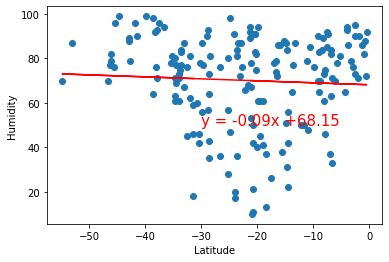

In [23]:
plt.scatter(x_values_s,y_humid_s)
plt.plot(x_values_s,regress_values_humids,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq_s,(-30,50),fontsize=15,color="red")

# Print r value
print(f"The r value is: {rvalue_humid_s}")

# Save the figure
plt.savefig("humdity_S_hemisphere.png")

# Show plot
plt.show()

### As mentioned above, the humidity is independent and doesn't show any relation with the latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [24]:
#hem_n_df = weather_data.loc[weather_data['Lat'] >= 0,:]
#x_values_n = hem_n_df["Lat"]
y_cloud_n = hem_n_df['Cloudiness']
 
# Perform a linear regression on Max Temperature vs. latitude
(slope_cloud_n, intercept_cloud_n, rvalue_cloud_n, pvalue, stderr) = stats.linregress(x_values_n, y_cloud_n)

# Get regression values
regress_values_cloudn = x_values_n * slope_cloud_n + intercept_cloud_n
#print(regress_values_cloudn)
line_eq_n = "y = " + str(round(slope_cloud_n,2)) + "x +" + str(round(intercept_cloud_n,2))

The r value is: 0.07287238429519725


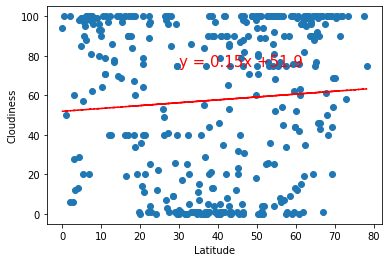

In [25]:
plt.scatter(x_values_n,y_cloud_n)
plt.plot(x_values_n,regress_values_cloudn,"r--")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq_n,(30,75),fontsize=15,color="red")

# Print r value
print(f"The r value is: {rvalue_cloud_n}")

# Save the figure
plt.savefig("cloudiness_N_hemisphere.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [26]:
#hem_s_df = weather_data.loc[weather_data['Lat'] < 0,:]
#x_values_s = hem_s_df["Lat"]
y_cloud_s = hem_s_df['Cloudiness']
# Perform a linear regression on Max Temperature vs. latitude
(slope_cloud_s, intercept_cloud_s, rvalue_cloud_s, pvalue, stderr) = stats.linregress(x_values_s, y_cloud_s)

# Get regression values
regress_values_clouds = x_values_s * slope_cloud_s + intercept_cloud_s
#print(regress_values_clouds)
line_eq_s = "y = " + str(round(slope_cloud_s,2)) + "x +" + str(round(intercept_cloud_s,2))


The r value is: 0.019103613924941778


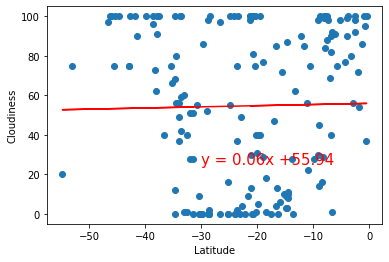

In [27]:
plt.scatter(x_values_s,y_cloud_s)
plt.plot(x_values_s,regress_values_clouds,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq_s,(-30,25),fontsize=15,color="red")

# Print r value
print(f"The r value is: {rvalue_cloud_s}")

# Save the figure
plt.savefig("cloudiness_S_hemisphere.png")

# Show plot
plt.show()

### From the r-value derived we could confirm that there is very weak correlation between Cloudiness and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [28]:
#hem_n_df = weather_data.loc[weather_data['Lat'] >= 0,:]
#x_values_n = hem_n_df["Lat"]
y_wind_n = hem_n_df['Wind Speed']
 
# Perform a linear regression on Max Temperature vs. latitude
(slope_wind_n, intercept_wind_n, rvalue_wind_n, pvalue, stderr) = stats.linregress(x_values_n, y_wind_n)

# Get regression values
regress_values_windn = x_values_n * slope_wind_n + intercept_wind_n
#print(regress_values_windn)
line_eq_n = "y = " + str(round(slope_wind_n,2)) + "x +" + str(round(intercept_wind_n,2))


The r value is: -0.08608471034583745


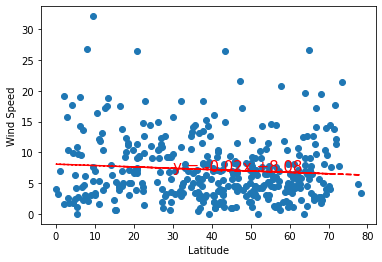

In [29]:
plt.scatter(x_values_n,y_wind_n)
plt.plot(x_values_n,regress_values_windn,"r--")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq_n,(30,7),fontsize=15,color="red")

# Print r value
print(f"The r value is: {rvalue_wind_n}")

# Save the figure
plt.savefig("wind_N_hemisphere.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [30]:
#hem_s_df = weather_data.loc[weather_data['Lat'] < 0,:]
#x_values_s = hem_s_df["Lat"]
y_wind_s = hem_s_df['Wind Speed']
# Perform a linear regression on Max Temperature vs. latitude
(slope_wind_s, intercept_wind_s, rvalue_wind_s, pvalue, stderr) = stats.linregress(x_values_s, y_wind_s)

# Get regression values
regress_values_winds = x_values_s * slope_wind_s + intercept_wind_s
#print(regress_values_winds)
line_eq_s = "y = " + str(round(slope_wind_s,2)) + "x +" + str(round(intercept_wind_s,2))

The r value is: 0.017264202760105957


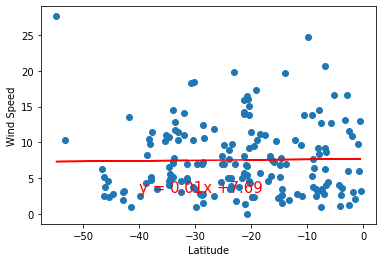

In [31]:
plt.scatter(x_values_s,y_wind_s)
plt.plot(x_values_s,regress_values_winds,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq_s,(-40,3),fontsize=15,color="red")

# Print r value
print(f"The r value is: {rvalue_wind_s}")

# Save the figure
plt.savefig("wind_S_hemisphere.png")

# Show plot
plt.show()

### The scatter plot and the r-value implies that there is very weak/no correlation between latitude and wind speed.